## Pandas library

In [160]:
import pandas as pd

## Dataframe

In [161]:
datas = [
            ["Mark",55,"Italy",4.5,"Europe"],
            ["john",33,"USA",6.9,"America"],
            ["Tim",41,"USA",3.9,"America"],
        ]
columns = ["name","age","country","score","continent"]

df = pd.DataFrame(data=datas,
                  columns= columns,
                  )
df

,name,age,country,score,continent
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


#### Index

In [162]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [163]:
df.index.name = "user_id"
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [164]:
df.reset_index()

,user_id,name,age,country,score,continent
0,0,Mark,55,Italy,4.5,Europe
1,1,john,33,USA,6.9,America
2,2,Tim,41,USA,3.9,America


In [165]:
df.set_index("name")

,age,country,score,continent
name,,,,
Mark,55,Italy,4.5,Europe
john,33,USA,6.9,America
Tim,41,USA,3.9,America


In [166]:
df.sort_index()

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [167]:
df.sort_index(ascending=False)

,name,age,country,score,continent
user_id,,,,,
2,Tim,41,USA,3.9,America
1,john,33,USA,6.9,America
0,Mark,55,Italy,4.5,Europe


In [168]:
df.sort_values(["continent"])

,name,age,country,score,continent
user_id,,,,,
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America
0,Mark,55,Italy,4.5,Europe


In [169]:
df.sort_values(["continent","age"])

,name,age,country,score,continent
user_id,,,,,
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America
0,Mark,55,Italy,4.5,Europe


In [170]:
df.sort_values(["continent","age"],ascending=False)

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
2,Tim,41,USA,3.9,America
1,john,33,USA,6.9,America


#### Columns

In [171]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [172]:
df.columns

Index(['name', 'age', 'country', 'score', 'continent'], dtype='object')

In [173]:
df_renames = df.rename(columns={"name": "First Name","age" : "Age"})

In [174]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [175]:
df_renames

,First Name,Age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [176]:
df.drop(columns=["name","country"])

,age,score,continent
user_id,,,
0,55,4.5,Europe
1,33,6.9,America
2,41,3.9,America


In [177]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [178]:
df.T

user_id,0,1,2
name,Mark,john,Tim
age,55,33,41
country,Italy,USA,USA
score,4.5,6.9,3.9
continent,Europe,America,America


## Data Manipulation

#### Selecting Data

In [179]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [180]:
df.loc[0,"name"]

'Mark'

In [181]:
df.loc[[0,1],"age"]

user_id
0    55
1    33
Name: age, dtype: int64

In [182]:
df.loc[:2,["name","country"]]

,name,country
user_id,,
0,Mark,Italy
1,john,USA
2,Tim,USA


In [183]:
df.iloc[0,0]

'Mark'

In [184]:
df.iloc[0,2]

'Italy'

In [185]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [186]:
tfs =  (df["age"] > 40) & (df["country"] == "USA")

In [187]:
df.loc[tfs,:]

,name,age,country,score,continent
user_id,,,,,
2,Tim,41,USA,3.9,America


In [188]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


Example1:  score > 4 and continent is Europe or America

In [189]:
tfs = (df['score'] > 4) & ((df['continent'] == "Europe") |  (df['continent'] == "America"))

In [190]:
df.loc[tfs,:]

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America


In [191]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [192]:
tfs= df["country"].isin(["Italy"])

In [193]:
df.loc[tfs,:]

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe


#### Copy dataframe

In [194]:
df2 = df.copy()
df2

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


#### Update data

In [195]:
df2.loc[1,"name"] = "JOHN"
df2

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,JOHN,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [196]:
tfs = df["age"] > 45
df2.loc[tfs,"score"] = 9.9
df2

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,9.9,Europe
1,JOHN,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [197]:
df2.replace("USA","U.S.")

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,9.9,Europe
1,JOHN,33,U.S.,6.9,America
2,Tim,41,U.S.,3.9,America


In [198]:
df2.loc[:,"discount"] = 1 
df2.loc[:,"price"] = [49.9,40.8,99.9] 
df2

,name,age,country,score,continent,discount,price
user_id,,,,,,,
0,Mark,55,Italy,9.9,Europe,1,49.9
1,JOHN,33,USA,6.9,America,1,40.8
2,Tim,41,USA,3.9,America,1,99.9


In [199]:
df2.loc[:,"birth year"] =  2022- df["age"]
df2

,name,age,country,score,continent,discount,price,birth year
user_id,,,,,,,,
0,Mark,55,Italy,9.9,Europe,1,49.9,1967
1,JOHN,33,USA,6.9,America,1,40.8,1989
2,Tim,41,USA,3.9,America,1,99.9,1981


#### Missing Data

In [200]:
df2.loc[0,"score"] = None

In [201]:
df2

,name,age,country,score,continent,discount,price,birth year
user_id,,,,,,,,
0,Mark,55,Italy,NaN,Europe,1,49.9,1967
1,JOHN,33,USA,6.9,America,1,40.8,1989
2,Tim,41,USA,3.9,America,1,99.9,1981


In [202]:
df2.isna()

,name,age,country,score,continent,discount,price,birth year
user_id,,,,,,,,
0,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False


In [203]:
dfs = df2.fillna({"score": 0 })
dfs.isna()

,name,age,country,score,continent,discount,price,birth year
user_id,,,,,,,,
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False


In [204]:
dfs

,name,age,country,score,continent,discount,price,birth year
user_id,,,,,,,,
0,Mark,55,Italy,0.0,Europe,1,49.9,1967
1,JOHN,33,USA,6.9,America,1,40.8,1989
2,Tim,41,USA,3.9,America,1,99.9,1981


In [205]:
df2.loc[0,"score"] = None
df2

,name,age,country,score,continent,discount,price,birth year
user_id,,,,,,,,
0,Mark,55,Italy,NaN,Europe,1,49.9,1967
1,JOHN,33,USA,6.9,America,1,40.8,1989
2,Tim,41,USA,3.9,America,1,99.9,1981


In [206]:
dfs = df2.dropna()
dfs

,name,age,country,score,continent,discount,price,birth year
user_id,,,,,,,,
1,JOHN,33,USA,6.9,America,1,40.8,1989
2,Tim,41,USA,3.9,America,1,99.9,1981


#### Duplicate Data

In [207]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [208]:
df["country"].is_unique

False

In [209]:
df["country"].unique()

array(['Italy', 'USA'], dtype=object)

In [210]:
df.drop_duplicates(["country"])

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America


In [211]:
df.loc[df["country"].duplicated(keep=False),:]

,name,age,country,score,continent
user_id,,,,,
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


#### Applying a function

In [212]:
rainfall = pd.DataFrame(data= {
                                "City 1": [300.111,100.222],
                                "City 2" : [400.333,300.444],
                                "City 3" : [10000.555,1100.666]
})
rainfall

,City 1,City 2,City 3
0,300.111,400.333,10000.555
1,100.222,300.444,1100.666


In [213]:
def format_string(x):
    return f"{x:,.1f}"

In [214]:
rainfall.applymap(format_string)

,City 1,City 2,City 3
0,300.1,400.3,"10,000.6"
1,100.2,300.4,"1,100.7"


## Combining Dataframes

#### Concatenating

In [215]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [216]:
datas = [
    [15,"france",4.1,"Becky"],
    [44,"Canada",6.4,"Leanne"]
]
more_users = pd.DataFrame(data=datas,
                            columns=["age","country","score","name"])
more_users

,age,country,score,name
0,15,france,4.1,Becky
1,44,Canada,6.4,Leanne


In [217]:
pd.concat([df,more_users])


,name,age,country,score,continent
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America
0,Becky,15,france,4.1,NaN
1,Leanne,44,Canada,6.4,NaN


In [218]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [219]:
datas = [
    [15,"france",4.1,"Becky"],
    [44,"Canada",6.4,"Leanne"]
]
more_users = pd.DataFrame(data=datas,
                            columns=["age1","country1","score1","name1"])
more_users

,age1,country1,score1,name1
0,15,france,4.1,Becky
1,44,Canada,6.4,Leanne


In [220]:
pd.concat([df,more_users])


,name,age,country,score,continent,age1,country1,score1,name1
0,Mark,55.0,Italy,4.5,Europe,NaN,NaN,NaN,NaN
1,john,33.0,USA,6.9,America,NaN,NaN,NaN,NaN
2,Tim,41.0,USA,3.9,America,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,15.0,france,4.1,Becky
1,NaN,NaN,NaN,NaN,NaN,44.0,Canada,6.4,Leanne


#### Joining and merge

In [221]:
df1 = pd.DataFrame(data= [
    [1,2],
    [3,4],
    [5,6]
],
    columns=["A","B"]
    )

df1

,A,B
0,1,2
1,3,4
2,5,6


In [222]:
df2 = pd.DataFrame(data= [
    [10,20],
    [30,40],
],
    columns=["C","D"]
    )

df2

,C,D
0,10,20
1,30,40


In [223]:
df1.join(df2,how="inner")

,A,B,C,D
0,1,2,10,20
1,3,4,30,40


In [224]:
df1.join(df2,how="left")

,A,B,C,D
0,1,2,10.0,20.0
1,3,4,30.0,40.0
2,5,6,NaN,NaN


In [225]:
df1.join(df2,how="right")

,A,B,C,D
0,1,2,10,20
1,3,4,30,40


In [226]:
df1.join(df2,how="outer")

,A,B,C,D
0,1,2,10.0,20.0
1,3,4,30.0,40.0
2,5,6,NaN,NaN


In [227]:
df1["category"] = ["a","b","c"]
df2["category"] = ["c","b"]

In [228]:
df1

,A,B,category
0,1,2,a
1,3,4,b
2,5,6,c


In [229]:
df2

,C,D,category
0,10,20,c
1,30,40,b


In [230]:
df1.merge(df2,how="inner", on=["category"])

,A,B,category,C,D
0,3,4,b,30,40
1,5,6,c,10,20


## Data Aggregation and Descriptive Statistics

#### Descriptive Statistics

In [231]:
rainfall

,City 1,City 2,City 3
0,300.111,400.333,10000.555
1,100.222,300.444,1100.666


In [232]:
rainfall.mean()

City 1     200.1665
City 2     350.3885
City 3    5550.6105
dtype: float64

In [233]:
rainfall.mean(axis=1)

0    3566.999667
1     500.444000
dtype: float64

#### Grouping

In [234]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [235]:
df.groupby(["continent"]).mean()

,age,score
continent,,
America,37.0,5.4
Europe,55.0,4.5


In [236]:
df.groupby(["continent"]).sum()

,age,score
continent,,
America,74,10.8
Europe,55,4.5


#### Pivoting

In [237]:
datas = [
    ["orange","north",12.30],
    ["apple","south",10.55],
    ["orange","south",22.00],
    ["banana","south",5.9],
    ["banana","south",31.3],
    ["orange","north",13.10]
]

sales = pd.DataFrame(data=datas,columns=["fruit","region","revenue"])
sales

,fruit,region,revenue
0,orange,north,12.30
1,apple,south,10.55
2,orange,south,22.00
3,banana,south,5.90
4,banana,south,31.30
5,orange,north,13.10


In [238]:
pivot = pd.pivot_table(sales,index="fruit",columns="region",
                        values="revenue",aggfunc="sum",
                        margins=True,margins_name="Total")
pivot

region,north,south,Total
fruit,,,
apple,NaN,10.55,10.55
banana,NaN,37.20,37.20
orange,25.4,22.00,47.40
Total,25.4,69.75,95.15


#### resample

In [239]:
index = pd.date_range('1/1/2000',periods=365,freq="D")
index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2000-12-21', '2000-12-22', '2000-12-23', '2000-12-24',
               '2000-12-25', '2000-12-26', '2000-12-27', '2000-12-28',
               '2000-12-29', '2000-12-30'],
              dtype='datetime64[ns]', length=365, freq='D')

In [240]:
range(365)

range(0, 365)

In [241]:
series = pd.Series(range(365),index=index)
series

2000-01-01      0
2000-01-02      1
2000-01-03      2
2000-01-04      3
2000-01-05      4
             ... 
2000-12-26    360
2000-12-27    361
2000-12-28    362
2000-12-29    363
2000-12-30    364
Freq: D, Length: 365, dtype: int64

In [242]:
summary = series.resample("M").sum()
summary

2000-01-31      465
2000-02-29     1305
2000-03-31     2325
2000-04-30     3165
2000-05-31     4216
2000-06-30     4995
2000-07-31     6107
2000-08-31     7068
2000-09-30     7755
2000-10-31     8959
2000-11-30     9585
2000-12-31    10485
Freq: M, dtype: int64

## Ploting

#### Matplotlib

In [243]:
import numpy as np
%matplotlib inline

In [244]:
datas = pd.DataFrame(data=np.random.rand(4,4)*100000,
                    index=["Q1","Q2","Q3","Q4"],
                    columns=["East","West","North","South"])
datas.index.name = "Quarthers"
datas.columns.name = "Region"
datas

Region,East,West,North,South
Quarthers,,,,
Q1,66208.824052,89683.796171,90112.556644,48989.133685
Q2,92809.289003,75995.890195,20332.084794,10102.304147
Q3,90219.510562,28858.106224,90087.344900,65733.126480
Q4,15188.833658,36519.822546,6562.774493,31290.197658


<AxesSubplot:xlabel='Quarthers'>

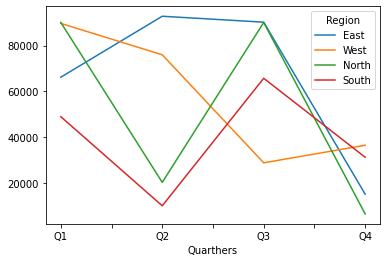

In [245]:
datas.plot()

<AxesSubplot:xlabel='Quarthers'>

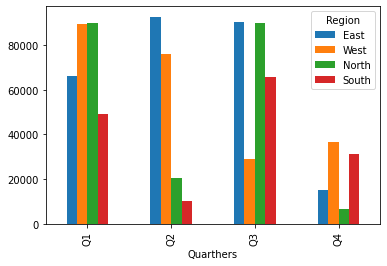

In [246]:
datas.plot(kind="bar")

In [247]:
#fig = datas.plot(kind="bar",figsize=(12,12),fontsize=26).get_figure()
#fig.savefig('export/bar_chart.png')

#### Plotly

In [248]:
pd.options.plotting.backend = "plotly"

In [249]:
#pd.options.plotting.backend = "matplotlib"

In [250]:
datas.plot()

In [251]:
datas.plot(kind="bar")

In [252]:
datas.plot(kind='bar',barmode="group")

In [253]:
datas.plot(kind='barh')

## Data import Export

#### Exporting to a CSV file

In [254]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [255]:
df.to_csv("export/export_from_dataframe.csv")

#### Importing a excel file

In [256]:
df = pd.read_csv("export/export_from_dataframe.csv")
df

,user_id,name,age,country,score,continent
0,0,Mark,55,Italy,4.5,Europe
1,1,john,33,USA,6.9,America
2,2,Tim,41,USA,3.9,America


In [257]:
df = pd.read_excel("data/course_participants.xlsx")
df

,user_id,name,age,country,score,continent
0,1001,Mark,55,Italy,4.5,Europe
1,1000,John,33,USA,6.7,America
2,1002,Tim,41,USA,3.9,America
3,1003,Jenny,12,Germany,9.0,Europe


In [258]:
df = pd.read_excel("data/stores.xlsx",sheet_name="2019",skiprows=1,usecols="B:F")
df

,Store,Employees,Manager,Since,Flagship
0,New York,10,Sarah,2018-07-20,False
1,San Francisco,12,Neriah,2019-11-02,MISSING
2,Chicago,4,Katelin,2020-01-31,NaN
3,Boston,5,Georgiana,2017-04-01,True
4,Washington DC,3,Evan,NaT,False
5,Las Vegas,11,Paul,2020-01-06,False


In [259]:
df.isna().sum()

Store        0
Employees    0
Manager      0
Since        1
Flagship     1
dtype: int64

In [260]:
df["Flagship"].unique()

array([False, 'MISSING', nan, True], dtype=object)

In [261]:
df = df.replace("MISSING", False)
df

,Store,Employees,Manager,Since,Flagship
0,New York,10,Sarah,2018-07-20,False
1,San Francisco,12,Neriah,2019-11-02,False
2,Chicago,4,Katelin,2020-01-31,NaN
3,Boston,5,Georgiana,2017-04-01,True
4,Washington DC,3,Evan,NaT,False
5,Las Vegas,11,Paul,2020-01-06,False


In [262]:
df = df.fillna({"Flagship": False })

In [263]:
df

,Store,Employees,Manager,Since,Flagship
0,New York,10,Sarah,2018-07-20,False
1,San Francisco,12,Neriah,2019-11-02,False
2,Chicago,4,Katelin,2020-01-31,False
3,Boston,5,Georgiana,2017-04-01,True
4,Washington DC,3,Evan,NaT,False
5,Las Vegas,11,Paul,2020-01-06,False


In [264]:
df["Since"].unique()

array(['2018-07-20T00:00:00.000000000', '2019-11-02T00:00:00.000000000',
       '2020-01-31T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
                                 'NaT', '2020-01-06T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [265]:
print(df.isna().sum())
df = df.dropna()
df

Store        0
Employees    0
Manager      0
Since        1
Flagship     0
dtype: int64


,Store,Employees,Manager,Since,Flagship
0,New York,10,Sarah,2018-07-20,False
1,San Francisco,12,Neriah,2019-11-02,False
2,Chicago,4,Katelin,2020-01-31,False
3,Boston,5,Georgiana,2017-04-01,True
5,Las Vegas,11,Paul,2020-01-06,False


## Example 1: sale report

In [266]:
# summary report pivote  daily / store / amout

In [267]:
df = pd.read_excel("data/sales_data/2021/January.xlsx")
df

,transaction_id,store,status,transaction_date,plan,contract_type,amount
0,abfbdd6d,Chicago,ACTIVE,2019-01-01,Silver,NEW,14.25
1,136a9997,San Francisco,ACTIVE,2019-01-01,Gold,NEW,19.35
2,c6688f32,San Francisco,ACTIVE,2019-01-01,Bronze,NEW,12.20
3,6ef349c1,Chicago,ACTIVE,2019-01-01,Gold,NEW,19.35
4,22066f29,San Francisco,ACTIVE,2019-01-01,Silver,NEW,14.25
...,...,...,...,...,...,...,...
9488,b487a1a6,New York,ACTIVE,2019-01-31,Silver,NEW,14.25
9489,9ab1fb48,Boston,ACTIVE,2019-01-31,Bronze,NEW,12.20
9490,08766c08,San Francisco,ACTIVE,2019-01-31,Silver,NEW,14.25
9491,3e56df84,Boston,ACTIVE,2019-01-31,Bronze,NEW,12.20


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9493 entries, 0 to 9492
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    9493 non-null   object        
 1   store             9493 non-null   object        
 2   status            9493 non-null   object        
 3   transaction_date  9493 non-null   datetime64[ns]
 4   plan              9493 non-null   object        
 5   contract_type     9493 non-null   object        
 6   amount            9493 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 519.3+ KB


In [269]:
df.describe()

,amount
count,9493.000000
mean,14.621626
std,2.493703
min,12.200000
25%,12.200000
50%,14.250000
75%,14.250000
max,19.350000


In [270]:
df.isna().sum()

transaction_id      0
store               0
status              0
transaction_date    0
plan                0
contract_type       0
amount              0
dtype: int64

In [271]:
df.head(5)

,transaction_id,store,status,transaction_date,plan,contract_type,amount
0,abfbdd6d,Chicago,ACTIVE,2019-01-01,Silver,NEW,14.25
1,136a9997,San Francisco,ACTIVE,2019-01-01,Gold,NEW,19.35
2,c6688f32,San Francisco,ACTIVE,2019-01-01,Bronze,NEW,12.20
3,6ef349c1,Chicago,ACTIVE,2019-01-01,Gold,NEW,19.35
4,22066f29,San Francisco,ACTIVE,2019-01-01,Silver,NEW,14.25


In [272]:
pivote =pd.pivot_table(df,index="transaction_date",columns="store",
                        values="amount",aggfunc="sum"
                        ,margins=True,margins_name="Total")
pivote

store,Boston,Chicago,Las Vegas,New York,San Francisco,Washington DC,Total
transaction_date,,,,,,,
2019-01-01 00:00:00,465.15,1277.25,269.70,1740.25,1739.20,355.15,5846.70
2019-01-02 00:00:00,621.80,1177.50,369.45,1833.85,1861.45,326.70,6190.75
2019-01-03 00:00:00,449.85,1204.95,302.25,1614.05,1736.20,286.95,5594.25
2019-01-04 00:00:00,600.45,1165.25,340.95,1712.95,1763.75,204.55,5787.90
2019-01-07 00:00:00,599.40,1197.80,395.90,1427.70,1967.20,265.65,5853.65
2019-01-08 00:00:00,698.05,987.05,215.70,2050.40,1866.45,344.05,6161.70
2019-01-09 00:00:00,590.25,1136.80,391.85,1909.30,1971.30,316.50,6316.00
2019-01-10 00:00:00,463.00,1027.80,408.10,1697.50,1714.85,247.30,5558.55
2019-01-11 00:00:00,578.00,1093.90,388.75,1974.45,2116.85,353.25,6505.20


In [273]:
pd.options.plotting.backend = "matplotlib"

In [274]:
plot = pivote["Total"][:-1]

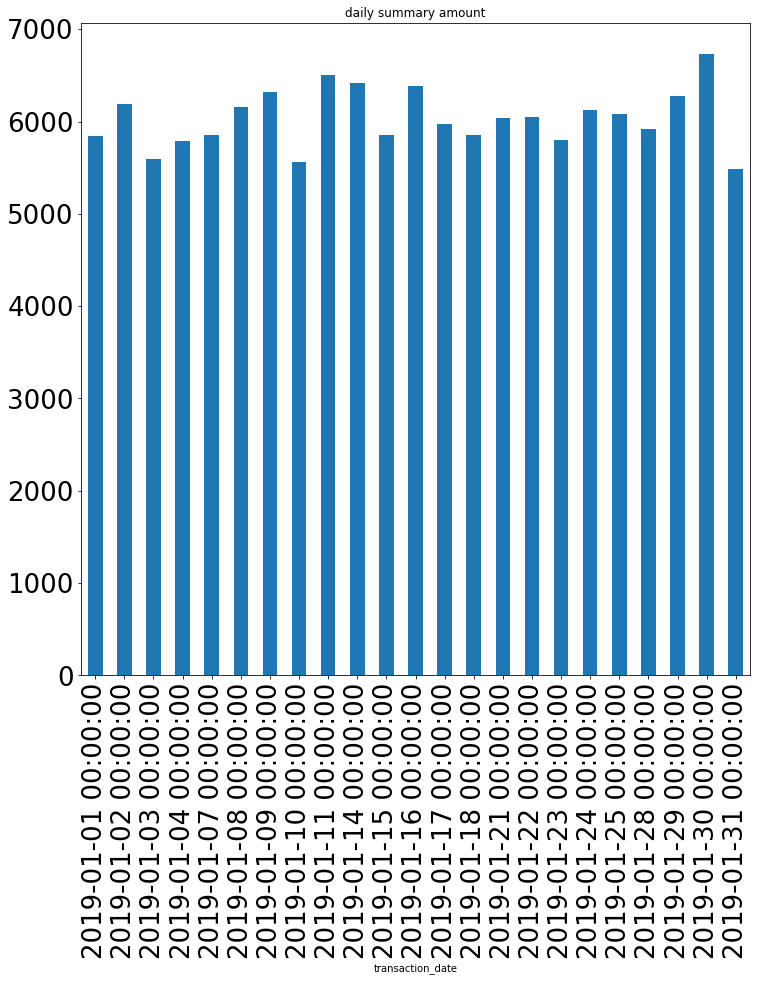

In [275]:
fig = plot.plot(kind="bar",figsize=(12,12),fontsize=26,title="daily summary amount").get_figure()
fig.savefig("export/pivote.png")

In [276]:
pivote.to_excel("export/sales_report_pandas.xlsx")

#### Example 2 summary store 2019,2020

In [277]:
sheets = pd.read_excel("data/stores.xlsx",skiprows=1,usecols=["Store","Employees"],sheet_name=["2019","2020"])
sheets

{'2019':            Store  Employees
 0       New York         10
 1  San Francisco         12
 2        Chicago          4
 3         Boston          5
 4  Washington DC          3
 5      Las Vegas         11,
 '2020':            Store  Employees
 0       New York         11
 1  San Francisco         10
 2        Chicago          5
 3         Boston          4
 4  Washington DC          7
 5      Las Vegas          8}

In [278]:
sheets["2019"]

,Store,Employees
0,New York,10
1,San Francisco,12
2,Chicago,4
3,Boston,5
4,Washington DC,3
5,Las Vegas,11


In [279]:
sheets["2020"]

,Store,Employees
0,New York,11
1,San Francisco,10
2,Chicago,5
3,Boston,4
4,Washington DC,7
5,Las Vegas,8


In [280]:
sheet_2019 =sheets["2019"]
sheet_2019["year"] = 2019
sheet_2019

,Store,Employees,year
0,New York,10,2019
1,San Francisco,12,2019
2,Chicago,4,2019
3,Boston,5,2019
4,Washington DC,3,2019
5,Las Vegas,11,2019


In [281]:
sheet_2020 =sheets["2020"]
sheet_2020["year"] = 2020
sheet_2020

,Store,Employees,year
0,New York,11,2020
1,San Francisco,10,2020
2,Chicago,5,2020
3,Boston,4,2020
4,Washington DC,7,2020
5,Las Vegas,8,2020


In [282]:
df =  pd.concat([sheet_2019,sheet_2020])
df

,Store,Employees,year
0,New York,10,2019
1,San Francisco,12,2019
2,Chicago,4,2019
3,Boston,5,2019
4,Washington DC,3,2019
5,Las Vegas,11,2019
0,New York,11,2020
1,San Francisco,10,2020
2,Chicago,5,2020
3,Boston,4,2020


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 5
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Store      12 non-null     object
 1   Employees  12 non-null     int64 
 2   year       12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 384.0+ bytes


In [284]:
df.isna().sum()

Store        0
Employees    0
year         0
dtype: int64

In [285]:
df.head()

,Store,Employees,year
0,New York,10,2019
1,San Francisco,12,2019
2,Chicago,4,2019
3,Boston,5,2019
4,Washington DC,3,2019


In [286]:
pivote = pd.pivot_table(df,index="year",columns="Store",values="Employees",aggfunc="sum",margins=True,margins_name="Total")
pivote[:-1]

Store,Boston,Chicago,Las Vegas,New York,San Francisco,Washington DC,Total
year,,,,,,,
2019,5,4,11,10,12,3,45
2020,4,5,8,11,10,7,45


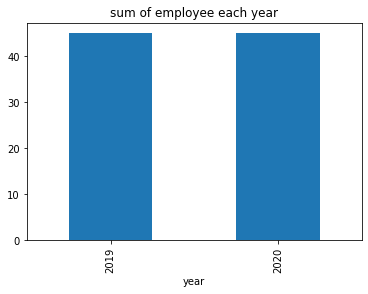

In [287]:
fig = pivote["Total"][:-1].plot(kind="bar",title="sum of employee each year")

<AxesSubplot:xlabel='year'>

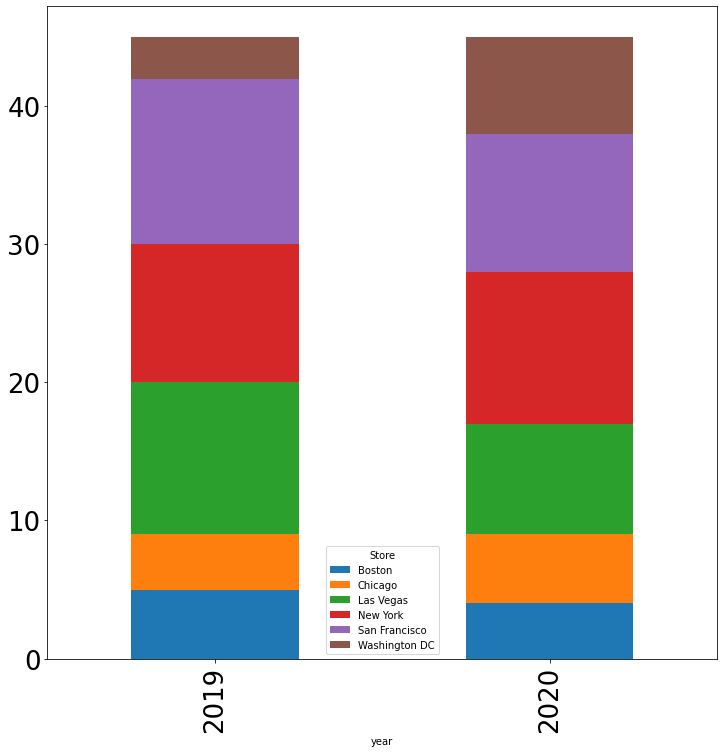

In [288]:
pivot_2 = pd.pivot_table(df,
                       index="year", columns="Store",
                       values="Employees", aggfunc="sum"
                       )
pivot_2

pivot_2.plot(kind='bar',stacked=True,figsize=(12, 12), fontsize=26)